In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

Problem 1


In [ ]:
data=pd.read_csv('/content/WHR-2024-5CS037.csv')

In [ ]:
data.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


Number of rows and colums

In [ ]:
data.shape


(143, 9)

In [ ]:
data.columns

Index(['Country name', 'score', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')

Missing values

In [ ]:
data.isna().sum()

,0
Country name,0
score,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3


Calculating Mean, Median and Standard Deviation

In [ ]:
mean_values=data['score'].mean()
mean_values

5.52758041958042

In [ ]:
median_values=data['score'].median()
median_values

5.785

In [ ]:
std_values=data['score'].std()
std_values

1.1707165099442995

Lowest and Highest Happiness scores

In [ ]:
lowest_score=data.loc[data['score'].idxmin()]
lowest_score

,142
Country name,Afghanistan
score,1.721
Log GDP per capita,0.628
Social support,0.0
Healthy life expectancy,0.242
Freedom to make life choices,0.0
Generosity,0.091
Perceptions of corruption,0.088
Dystopia + residual,0.672


In [ ]:
highest_score=data.loc[data['score'].idxmax()]
highest_score

,0
Country name,Finland
score,7.741
Log GDP per capita,1.844
Social support,1.572
Healthy life expectancy,0.695
Freedom to make life choices,0.859
Generosity,0.142
Perceptions of corruption,0.546
Dystopia + residual,2.082


Filtering and Sorting

In [ ]:
filtered=data[data['score']>7.5]
filtered

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


In [ ]:
sort=data.sort_values(by='Log GDP per capita',ascending=False)
sort.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
16,Ireland,6.838,2.129,1.390,0.700,0.758,0.205,0.418,1.239
29,Singapore,6.523,2.118,1.361,0.769,0.743,0.168,0.575,0.788
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
22,United States,6.725,1.939,1.392,0.542,0.586,0.223,0.169,1.873
85,Hong Kong S.A.R. of China,5.316,1.909,1.184,0.857,0.485,0.147,0.402,0.333
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906


Happiness category choices

In [ ]:
conditions = [
    (data['score'] > 6),
    (data['score'] >= 4) & (data['score'] < 6),
    (data['score'] < 4)
]
choices = ['High', 'Medium', 'Low']

data['Happiness_Category'] = np.select(conditions, choices, default='Unknown')

(data['Happiness_Category'].value_counts())


,count
Happiness_Category,
Medium,70
High,56
Low,17


Data Visualizations

Bar plot

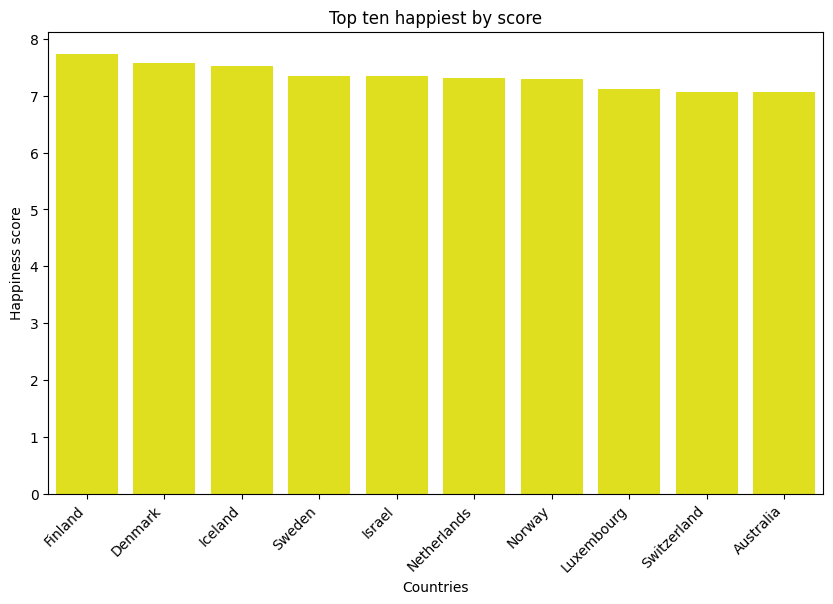

In [ ]:
Top_10_happiest =data.sort_values('score',ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Country name',y='score',color='yellow',data=Top_10_happiest)
plt.title("Top ten happiest by score")
plt.ylabel('Happiness score')
plt.xlabel('Countries')
plt.xticks(rotation=45,ha="right")
plt.show()

Line Plot

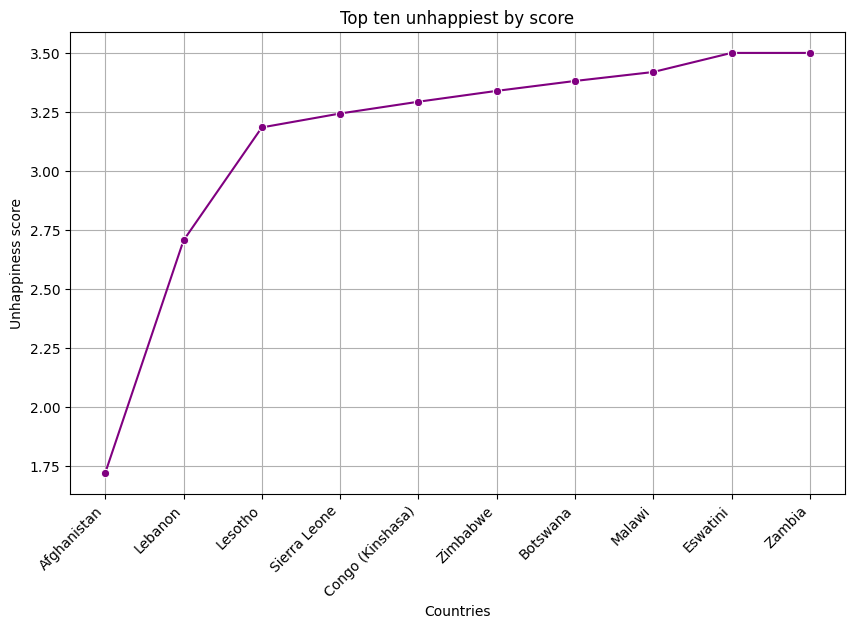

In [ ]:
Top_10_unhappiest =data.sort_values('score',ascending=True).head(10)
plt.figure(figsize=(10,6))
sns.lineplot(x='Country name',y='score',color='purple',marker='o',data=Top_10_unhappiest)
plt.title("Top ten unhappiest by score")
plt.xlabel('Countries')
plt.ylabel('Unhappiness score')
plt.xticks(rotation=45,ha="right")
plt.grid(True)
plt.show()

Histogram

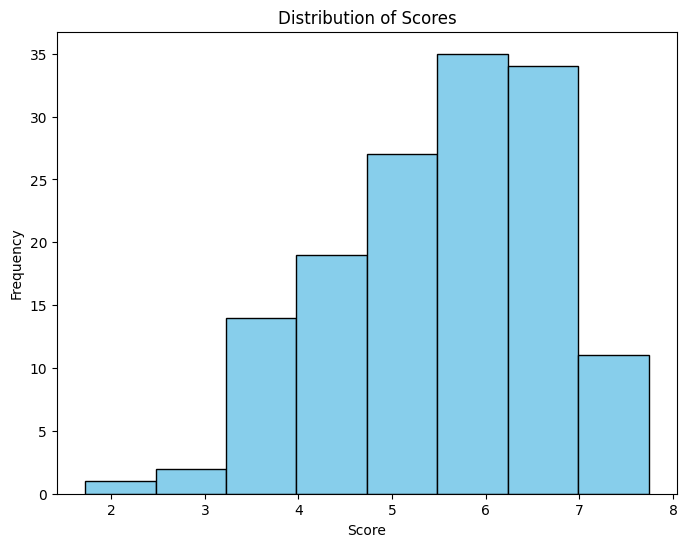

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(data['score'], bins=8, color='skyblue', edgecolor='black')
plt.title("Distribution of Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

Scatter plot

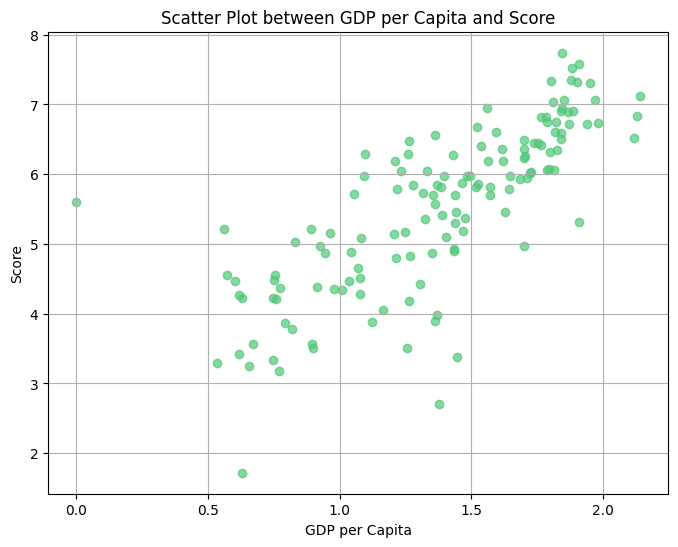

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Log GDP per capita'], data['score'], color='#50C878', alpha=0.7)

plt.title("Scatter Plot between GDP per Capita and Score")
plt.xlabel("GDP per Capita")
plt.ylabel("Score")

plt.grid(True)
plt.show()

Problem 2

Task1

In [ ]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Sri Lanka"]
filtered_data = data[data['Country name'].isin(south_asian_countries)]

filtered_data.to_csv('south_asian_countries_data.csv', index=False)


Task 2

In [ ]:
south_asian_countries_df = data[data['Country name'].isin(south_asian_countries)].copy()

south_asian_countries_df['Composite Score'] = (
    0.40 * south_asian_countries_df['Log GDP per capita'] +
    0.30 * south_asian_countries_df['Social support'] +
    0.30 * south_asian_countries_df['Healthy life expectancy']
)

composite_score = south_asian_countries_df.sort_values('Composite Score', ascending=False).head(10)

composite_score[['Country name','Composite Score', ]]


,Country name,Composite Score
127,Sri Lanka,1.0739
92,Nepal,0.8159
125,India,0.7874
107,Pakistan,0.7039
128,Bangladesh,0.6774
142,Afghanistan,0.3238


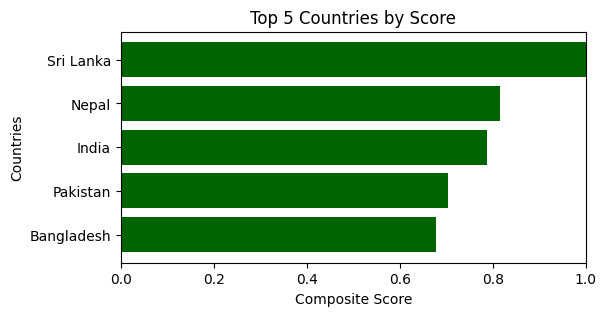

In [ ]:
plt.figure(figsize=(6, 3))
composite_score = composite_score.sort_values('Composite Score', ascending=False).head(5)
plt.barh(composite_score['Country name'], composite_score['Composite Score'], color='darkgreen')
plt.title("Top 5 Countries by Score")
plt.ylabel('Countries')
plt.xlabel('Composite Score')
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.show()


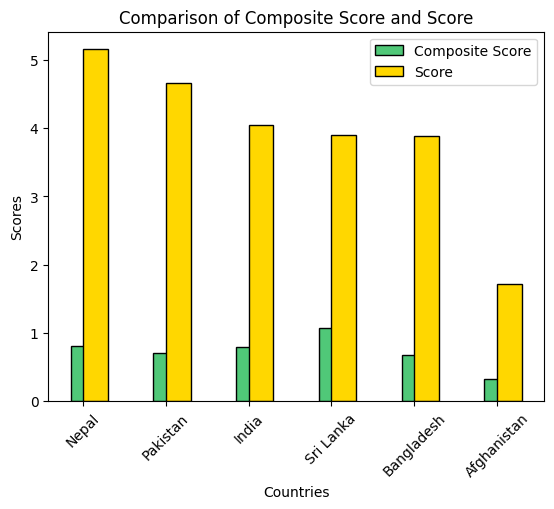

In [ ]:
countries = south_asian_countries_df['Country name']
composite_scores = south_asian_countries_df['Composite Score']
scores = south_asian_countries_df['score']

plt.bar(countries, composite_scores, width=0.3, color='#50C878', edgecolor='black', label='Composite Score', align='center')
plt.bar(countries, scores, width=0.3, color='gold', edgecolor='black', label='Score', align='edge')

plt.xlabel('Countries')
plt.ylabel('Scores')
plt.title('Comparison of Composite Score and Score')
plt.xticks(rotation=45)
plt.legend()

plt.show()

The rankings based on the Composite Score doesnot really align with the original score. Maybe if we could also add other metrices to find out the composite score then it could've aligned with the original score.

Task-3 -Outlier Detection

In [ ]:
Q1_score = south_asian_countries_df['score'].quantile(0.25)
Q3_score = south_asian_countries_df['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

Q1_gdp = south_asian_countries_df['Log GDP per capita'].quantile(0.25)
Q3_gdp = south_asian_countries_df['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_score = Q3_score + 1.5 * IQR_score

lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp
upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp

outliers_score = south_asian_countries_df[
    (south_asian_countries_df['score'] < lower_bound_score) |
    (south_asian_countries_df['score'] > upper_bound_score)
]

outliers_gdp = south_asian_countries_df[
    (south_asian_countries_df['Log GDP per capita'] < lower_bound_gdp) |
    (south_asian_countries_df['Log GDP per capita'] > upper_bound_gdp)
]

outliers = pd.concat([outliers_score, outliers_gdp]).drop_duplicates()

outliers[['Country name', 'score', 'Log GDP per capita']]

,Country name,score,Log GDP per capita
142,Afghanistan,1.721,0.628


The outlier is Afghanistan. The outlier can potentially lower regional averages like; GDP per capita, social support, average life expectancy and other metrices.

Scatter plot of GDP per Capita and Score

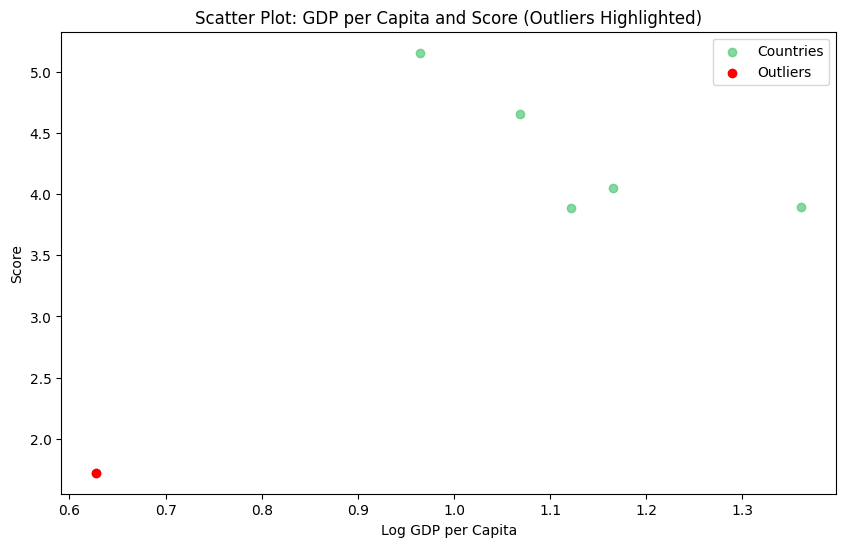

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(south_asian_countries_df['Log GDP per capita'], south_asian_countries_df['score'], label='Countries', c='#50C878', alpha=0.7)

plt.scatter(outliers['Log GDP per capita'], outliers['score'], label='Outliers', c='red', alpha=1)

plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.title('Scatter Plot: GDP per Capita and Score (Outliers Highlighted)')

plt.legend()

plt.show()


Task-4 -Exploring trends across metrics

In [ ]:
metrics = [ 'Social support','Healthy life expectancy']

correlation_social_support = south_asian_countries_df[metrics[0]].corr(south_asian_countries_df['score'])
correlation_healthy_life_expectancy = south_asian_countries_df[metrics[1]].corr(south_asian_countries_df['score'])

correlation_social_support, correlation_healthy_life_expectancy


(0.6974343971971296, 0.4615442007568599)

Scatter plots with trendlines for these metrics against the Score.

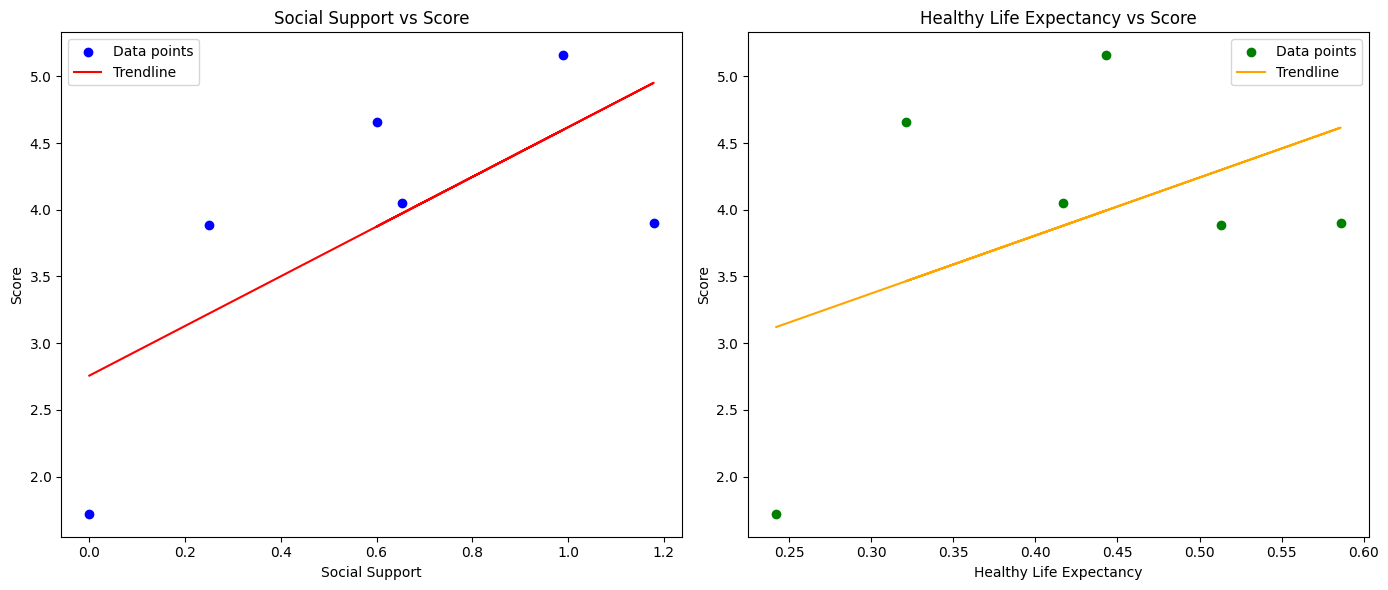

In [ ]:
plt.figure(figsize=(14, 6))

# Social Support vs Score
plt.subplot(1, 2, 1)
x_social_support = south_asian_countries_df['Social support']
y_score = south_asian_countries_df['score']
plt.scatter(x_social_support, y_score, color='blue', label='Data points')
# Calculate trendline
coeff_social_support = np.polyfit(x_social_support, y_score, 1)
trendline_social_support = np.polyval(coeff_social_support, x_social_support)
plt.plot(x_social_support, trendline_social_support, color='red', label='Trendline')
plt.xlabel('Social Support')
plt.ylabel('Score')
plt.title('Social Support vs Score')
plt.legend()

# Healthy Life Expectancy vs Score
plt.subplot(1, 2, 2)
x_healthy_life_expectancy = south_asian_countries_df['Healthy life expectancy']
plt.scatter(x_healthy_life_expectancy, y_score, color='green', label='Data points')
# Calculate trendline
coeff_healthy_life = np.polyfit(x_healthy_life_expectancy, y_score, 1)
trendline_healthy_life = np.polyval(coeff_healthy_life, x_healthy_life_expectancy)
plt.plot(x_healthy_life_expectancy, trendline_healthy_life, color='orange', label='Trendline')
plt.xlabel('Healthy Life Expectancy')
plt.ylabel('Score')
plt.title('Healthy Life Expectancy vs Score')
plt.legend()

plt.tight_layout()
plt.show()


Social support has stronger relationship with score than healthy life expectancy whereas healthy life expectancy has weaker realtionship with score compared to social support.

In [ ]:
south_asian_countries_df['GDP-Score Gap'] =  south_asian_countries_df['Log GDP per capita']-south_asian_countries_df['score']

(south_asian_countries_df[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']])


,Country name,Log GDP per capita,score,GDP-Score Gap
92,Nepal,0.965,5.158,-4.193
107,Pakistan,1.069,4.657,-3.588
125,India,1.166,4.054,-2.888
127,Sri Lanka,1.361,3.898,-2.537
128,Bangladesh,1.122,3.886,-2.764
142,Afghanistan,0.628,1.721,-1.093


Ranking based on ascending order

In [ ]:
ascending_gap = south_asian_countries_df.sort_values(by='GDP-Score Gap', ascending=True)
ascending_gap

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category,Composite Score,GDP-Score Gap
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093


Ranking based on descending order

In [ ]:
descending_gap= south_asian_countries_df.sort_values(by='GDP-Score Gap', ascending=False)
descending_gap


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category,Composite Score,GDP-Score Gap
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193


Bar chart of top 3 countries with largest positive gap and negative gap

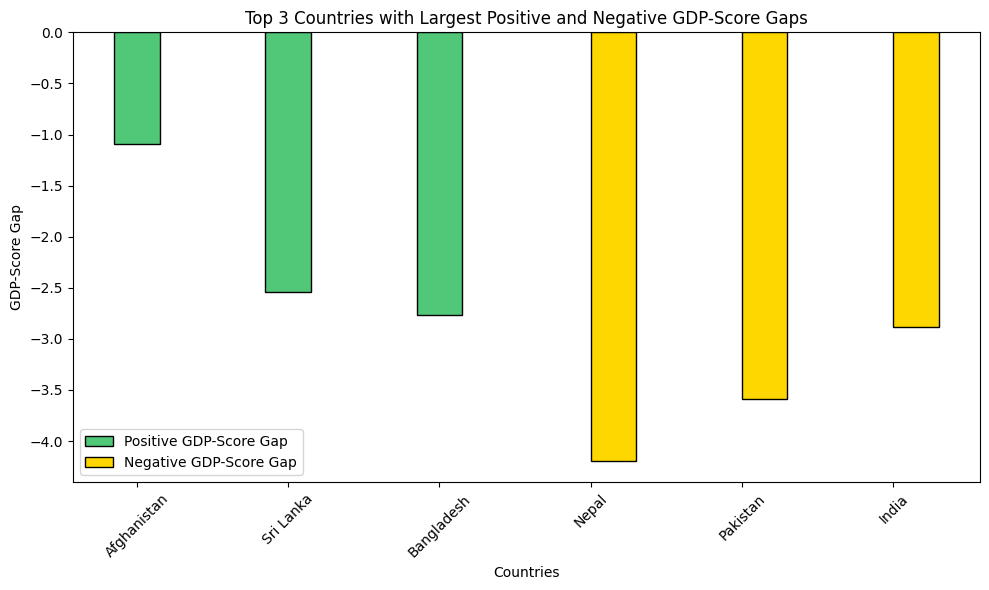

In [ ]:
import matplotlib.pyplot as plt

descending_rank = south_asian_countries_df.sort_values(by='GDP-Score Gap', ascending=False)
ascending_rank = south_asian_countries_df.sort_values(by='GDP-Score Gap', ascending=True)

top_positive = descending_rank.head(3)
top_negative = ascending_rank.head(3)

plt.figure(figsize=(10, 6))

plt.bar(top_positive['Country name'], top_positive['GDP-Score Gap'], width=0.3, color='#50C878', edgecolor='black', label='Positive GDP-Score Gap', align='center')
plt.bar(top_negative['Country name'], top_negative['GDP-Score Gap'], width=0.3, color='gold', edgecolor='black', label='Negative GDP-Score Gap', align='edge')

plt.xlabel('Countries')
plt.ylabel('GDP-Score Gap')
plt.title('Top 3 Countries with Largest Positive and Negative GDP-Score Gaps')
plt.xticks(rotation=45)


plt.legend()
plt.tight_layout()
plt.show()


As you can see that all of the countries here have score gaps in negative. The reason behind these gaps might be South asia being a developing region. the implications can be to do better job at economic and political stability.

Problem 3- Comparative Analysis

In [ ]:
middle_eastern_countries=[ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]
middle_eastern_df = data[data['Country name'].isin(middle_eastern_countries)]


Mean median and standard deviation of Middle eastern and South asian countries

In [ ]:
statistics_middle_eastern = middle_eastern_df[['score']].agg( ['mean', 'median', 'std'])
statistics_south_asian=south_asian_countries_df[['score']].agg(['mean', 'median', 'std'])
print("the statistics for middle eastern countries:",statistics_middle_eastern);
print("the statistics for south asian countries:",statistics_south_asian);


the statistics for middle eastern countries:            score
mean    5.412100
median  5.562500
std     1.566201
the statistics for south asian countries:            score
mean    3.895667
median  3.976000
std     1.177069


Which region has highest happiness scores?

In [ ]:
if middle_eastern_df['score'].mean() > south_asian_countries_df['score'].mean():
    print("Middle Eastern countries have higher average happiness scores.")
else:
    print("South Asian countries have higher or equal average happiness scores.")

Middle Eastern countries have higher average happiness scores.


Bar chart for top 3 and bottom 3 countries of each region

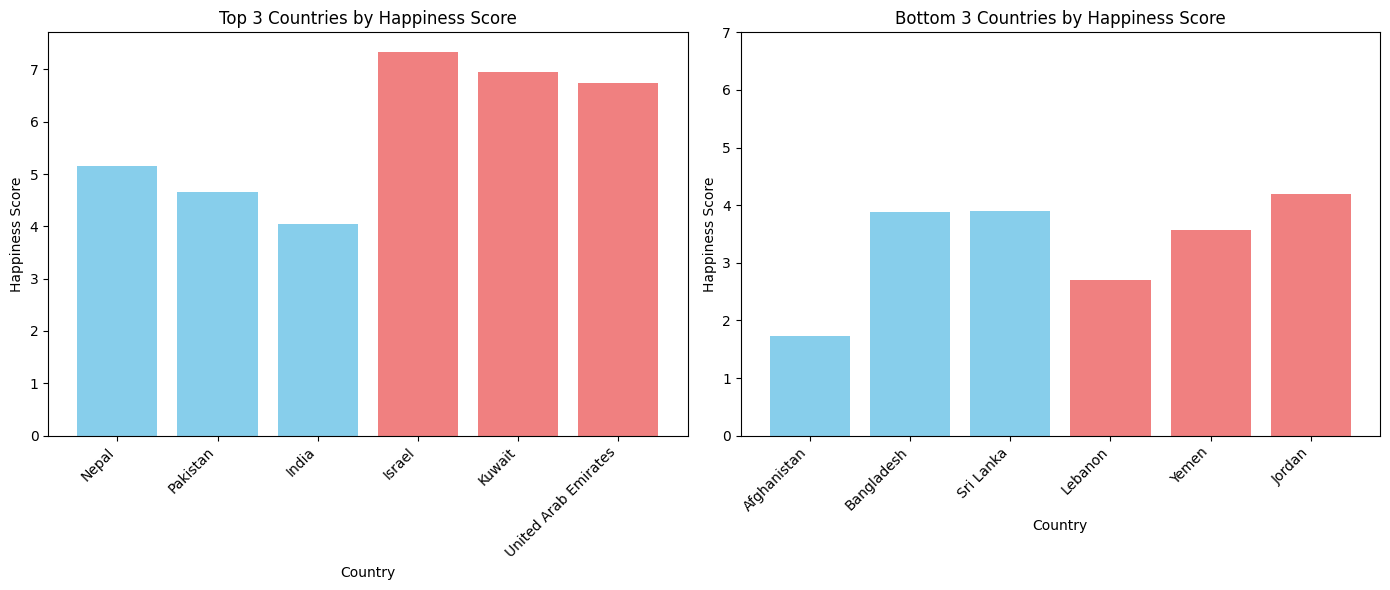

In [ ]:

south_top_3 = south_asian_countries_df.sort_values(by='score', ascending=False).head(3)
south_bottom_3 = south_asian_countries_df.sort_values(by='score', ascending=True).head(3)

middle_top_3 = middle_eastern_df.sort_values(by='score', ascending=False).head(3)
middle_bottom_3 = middle_eastern_df.sort_values(by='score', ascending=True).head(3)

top_countries = pd.concat([south_top_3, middle_top_3])
bottom_countries = pd.concat([south_bottom_3, middle_bottom_3])

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.bar(top_countries['Country name'], top_countries['score'], color=['skyblue', 'skyblue','skyblue','lightcoral','lightcoral','lightcoral'])
plt.title('Top 3 Countries by Happiness Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.bar(bottom_countries['Country name'], bottom_countries['score'], color=['skyblue','skyblue','skyblue','lightcoral','lightcoral','lightcoral'])
plt.title('Bottom 3 Countries by Happiness Score')
plt.xlabel('Country')
plt.ylim(0,7)
plt.ylabel('Happiness Score')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Metric Comparisions

In [ ]:
south_asian_countries_df = south_asian_countries_df.copy()
middle_eastern_df = middle_eastern_df.copy()

south_asian_countries_df.loc[:, 'Region'] = 'South Asia'
middle_eastern_df.loc[:, 'Region'] = 'Middle East'

south_asian_gdp = south_asian_countries_df['Log GDP per capita'].mean()
middle_eastern_gdp = middle_eastern_df['Log GDP per capita'].mean()

south_asian_social_support = south_asian_countries_df['Social support'].mean()
middle_eastern_social_support = middle_eastern_df['Social support'].mean()

south_asian_healthy_life_expectancy = south_asian_countries_df['Healthy life expectancy'].mean()
middle_eastern_healthy_life_expectancy = middle_eastern_df['Healthy life expectancy'].mean()


Bar graph of GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions

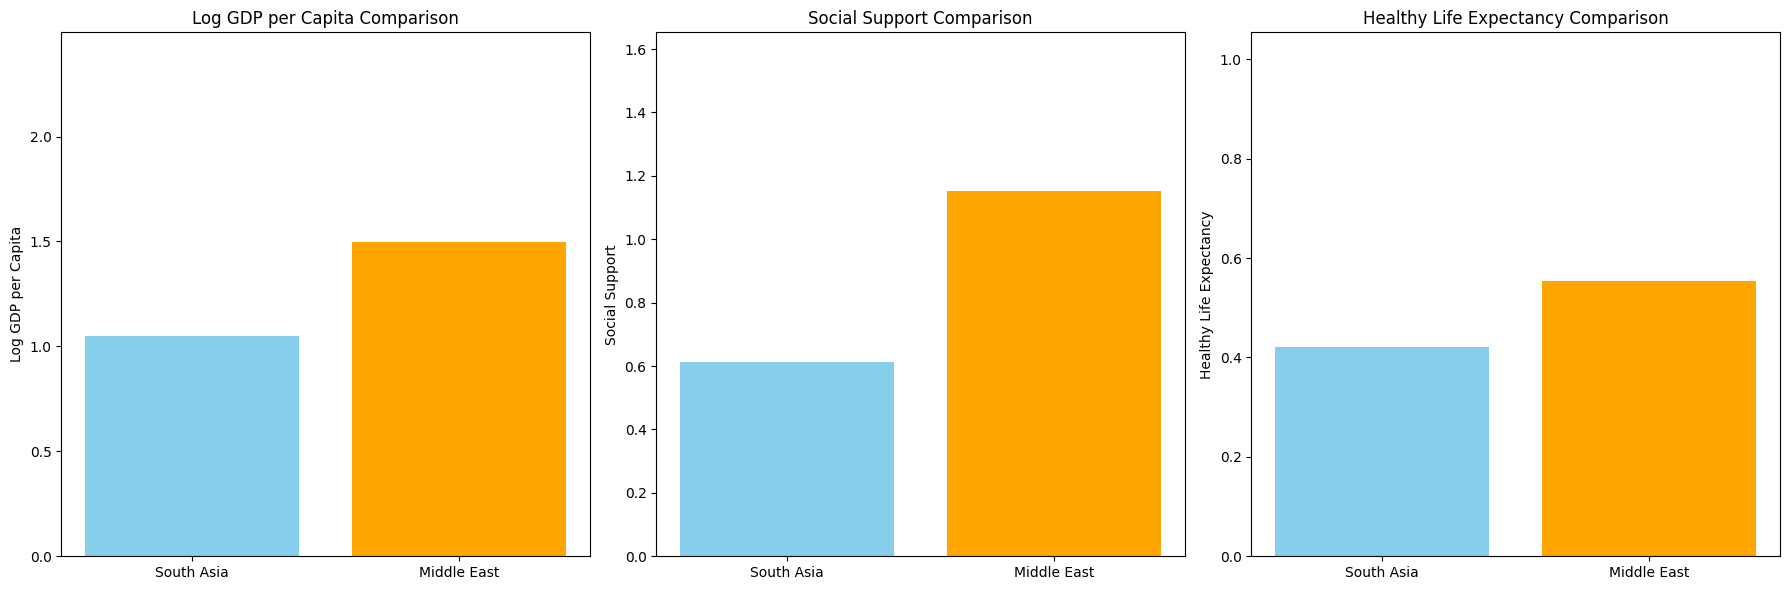

In [ ]:
south_asian_countries_df.loc[:, 'Region'] = 'South Asia'
middle_eastern_df.loc[:, 'Region'] = 'Middle East'

south_asian_gdp = south_asian_countries_df['Log GDP per capita'].mean()
middle_eastern_gdp = middle_eastern_df['Log GDP per capita'].mean()

south_asian_social_support = south_asian_countries_df['Social support'].mean()
middle_eastern_social_support = middle_eastern_df['Social support'].mean()

south_asian_life_expectancy = south_asian_countries_df['Healthy life expectancy'].mean()
middle_eastern_life_expectancy = middle_eastern_df['Healthy life expectancy'].mean()

gdp_data = [south_asian_gdp, middle_eastern_gdp]
social_support_data = [south_asian_social_support, middle_eastern_social_support]
life_expectancy_data = [south_asian_life_expectancy, middle_eastern_life_expectancy]
regions = ['South Asia', 'Middle East']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].bar(regions, gdp_data, color=['skyblue', 'orange'])
axes[0].set_title('Log GDP per Capita Comparison')
axes[0].set_ylabel('Log GDP per Capita')
axes[0].set_ylim([0, max(gdp_data) + 1])

axes[1].bar(regions, social_support_data, color=['skyblue', 'orange'])
axes[1].set_title('Social Support Comparison')
axes[1].set_ylabel('Social Support')
axes[1].set_ylim([0, max(social_support_data) + 0.5])

axes[2].bar(regions, life_expectancy_data, color=['skyblue', 'orange'])
axes[2].set_title('Healthy Life Expectancy Comparison')
axes[2].set_ylabel('Healthy Life Expectancy')
axes[2].set_ylim([0, max(life_expectancy_data) + 0.5])

plt.tight_layout()
plt.show()


From the visualization, we can understand that social support has the largest disparity between two regions

Happiness disparity

In [ ]:
south_asian_score=south_asian_countries_df['score']
middle_eastern_score=middle_eastern_df['score']
south_asian_range=south_asian_score.max()-south_asian_score.min()
middle_eastern_range=middle_eastern_score.max()-middle_eastern_score.min()
south_asian_ev=south_asian_countries_df['Healthy life expectancy']
middle_eastern_ev=middle_eastern_df['Healthy life expectancy']
south_asian_cv=(south_asian_score.std()/south_asian_score.mean())*100
middle_eastern_cv=(middle_eastern_score.std()/middle_eastern_score.mean())*100
print(f"South asia range: {south_asian_range}")
print(f"Middle eastern range: {middle_eastern_range}")
print(f"South asia cv: {south_asian_cv}")
print(f"Middle eastern cv: {middle_eastern_cv}")
if south_asian_cv>middle_eastern_cv:
    print("South asia has greater variability in happiness")
else:
    print("Middle eastern has greater variability in happiness")

South asia range: 3.4370000000000003
Middle eastern range: 4.634
South asia cv: 30.21482883337427
Middle eastern cv: 28.938880812119404
South asia has greater variability in happiness


Correlation analysis

In [ ]:
south_asian_corr=south_asian_countries_df[['score','Freedom to make life choices','Generosity']].corr()
middle_eastern_corr=middle_eastern_df[['score','Freedom to make life choices','Generosity']].corr()
print(f"South asia correlation: {south_asian_corr}")
print(f"Middle eastern correlation: {middle_eastern_corr}")


South asia correlation:                                  score  Freedom to make life choices  \
score                         1.000000                      0.800519   
Freedom to make life choices  0.800519                      1.000000   
Generosity                    0.874512                      0.733396   

                              Generosity  
score                           0.874512  
Freedom to make life choices    0.733396  
Generosity                      1.000000  
Middle eastern correlation:                                  score  Freedom to make life choices  \
score                         1.000000                      0.863220   
Freedom to make life choices  0.863220                      1.000000   
Generosity                    0.627524                      0.388854   

                              Generosity  
score                           0.627524  
Freedom to make life choices    0.388854  
Generosity                      1.000000  


Scatter plot to visualize and interpret the relationships

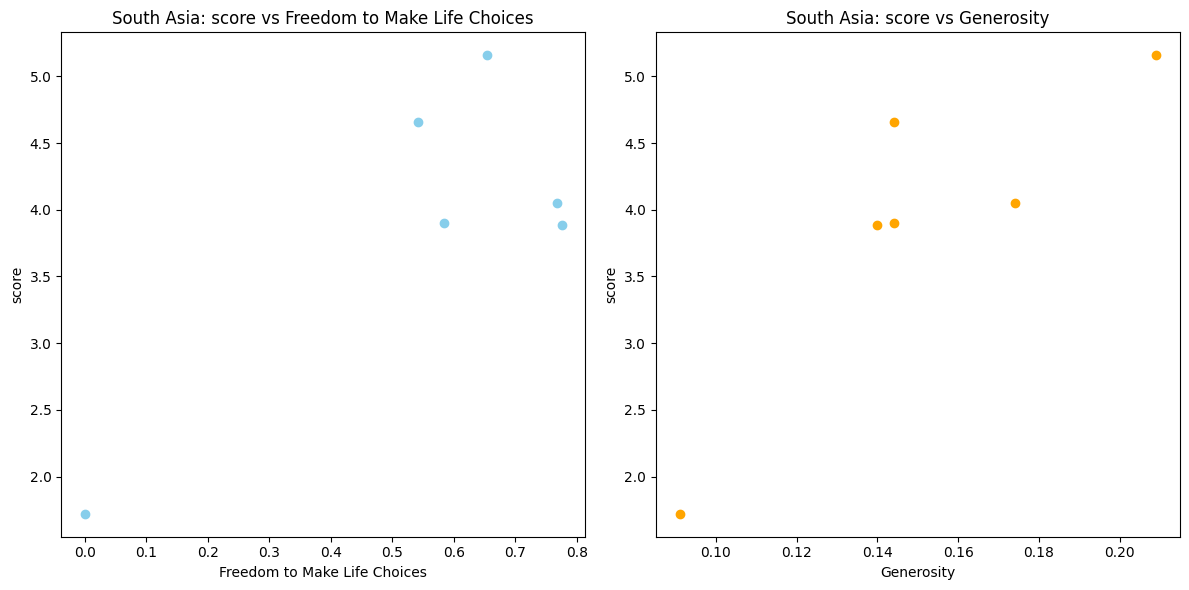

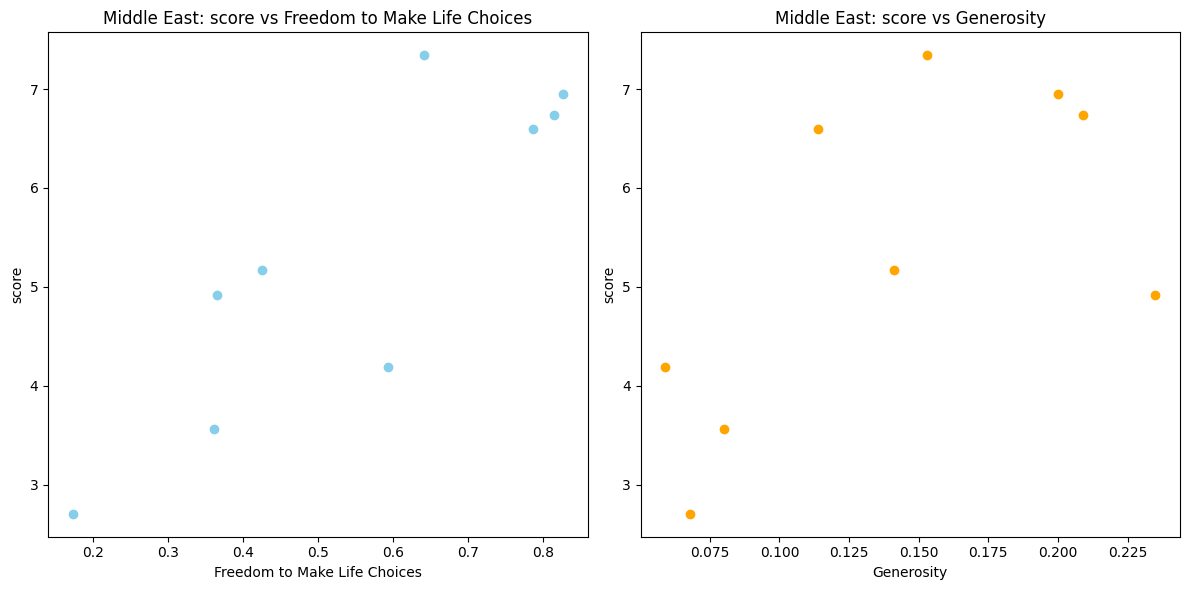

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(south_asian_countries_df['Freedom to make life choices'], south_asian_countries_df['score'], color='skyblue')
plt.title('South Asia: score vs Freedom to Make Life Choices')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('score')

plt.subplot(1, 2, 2)
plt.scatter(south_asian_countries_df['Generosity'], south_asian_countries_df['score'], color='orange')
plt.title('South Asia: score vs Generosity')
plt.xlabel('Generosity')
plt.ylabel('score')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(middle_eastern_df['Freedom to make life choices'], middle_eastern_df['score'], color='skyblue')
plt.title('Middle East: score vs Freedom to Make Life Choices')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('score')

plt.subplot(1, 2, 2)
plt.scatter(middle_eastern_df['Generosity'], middle_eastern_df['score'], color='orange')
plt.title('Middle East: score vs Generosity')
plt.xlabel('Generosity')
plt.ylabel('score')

plt.tight_layout()
plt.show()


Outlier Detection

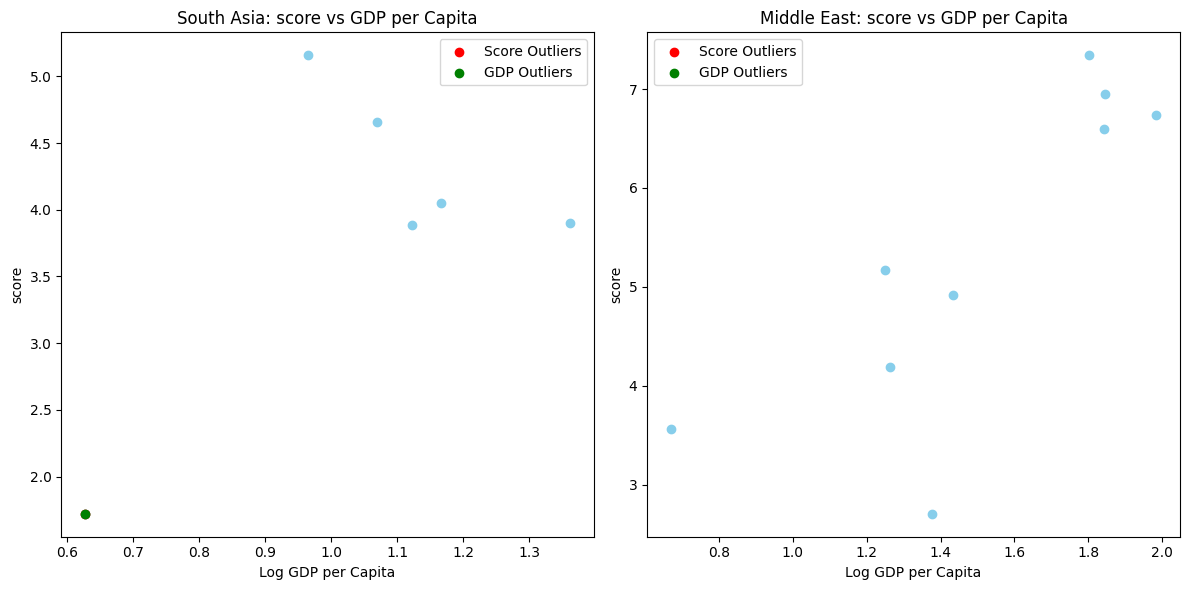

South Asia Score Outliers:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628

South Asia GDP per Capita Outliers:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628

Middle East Score Outliers:
Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []

Middle East GDP per Capita Outliers:
Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []


In [ ]:
south_asian_score_Q1 = south_asian_countries_df['score'].quantile(0.25)
south_asian_score_Q3 = south_asian_countries_df['score'].quantile(0.75)
south_asian_score_IQR = south_asian_score_Q3 - south_asian_score_Q1
south_asian_score_lower_bound = south_asian_score_Q1 - 1.5 * south_asian_score_IQR
south_asian_score_upper_bound = south_asian_score_Q3 + 1.5 * south_asian_score_IQR

south_asian_score_outliers = south_asian_countries_df[(south_asian_countries_df['score'] < south_asian_score_lower_bound) |
                                                      (south_asian_countries_df['score'] > south_asian_score_upper_bound)]

south_asian_gdp_Q1 = south_asian_countries_df['Log GDP per capita'].quantile(0.25)
south_asian_gdp_Q3 = south_asian_countries_df['Log GDP per capita'].quantile(0.75)
south_asian_gdp_IQR = south_asian_gdp_Q3 - south_asian_gdp_Q1
south_asian_gdp_lower_bound = south_asian_gdp_Q1 - 1.5 * south_asian_gdp_IQR
south_asian_gdp_upper_bound = south_asian_gdp_Q3 + 1.5 * south_asian_gdp_IQR

south_asian_gdp_outliers = south_asian_countries_df[(south_asian_countries_df['Log GDP per capita'] < south_asian_gdp_lower_bound) |
                                                   (south_asian_countries_df['Log GDP per capita'] > south_asian_gdp_upper_bound)]

middle_eastern_score_Q1 = middle_eastern_df['score'].quantile(0.25)
middle_eastern_score_Q3 = middle_eastern_df['score'].quantile(0.75)
middle_eastern_score_IQR = middle_eastern_score_Q3 - middle_eastern_score_Q1
middle_eastern_score_lower_bound = middle_eastern_score_Q1 - 1.5 * middle_eastern_score_IQR
middle_eastern_score_upper_bound = middle_eastern_score_Q3 + 1.5 * middle_eastern_score_IQR

middle_eastern_score_outliers = middle_eastern_df[(middle_eastern_df['score'] < middle_eastern_score_lower_bound) |
                                                  (middle_eastern_df['score'] > middle_eastern_score_upper_bound)]

middle_eastern_gdp_Q1 = middle_eastern_df['Log GDP per capita'].quantile(0.25)
middle_eastern_gdp_Q3 = middle_eastern_df['Log GDP per capita'].quantile(0.75)
middle_eastern_gdp_IQR = middle_eastern_gdp_Q3 - middle_eastern_gdp_Q1
middle_eastern_gdp_lower_bound = middle_eastern_gdp_Q1 - 1.5 * middle_eastern_gdp_IQR
middle_eastern_gdp_upper_bound = middle_eastern_gdp_Q3 + 1.5 * middle_eastern_gdp_IQR

middle_eastern_gdp_outliers = middle_eastern_df[(middle_eastern_df['Log GDP per capita'] < middle_eastern_gdp_lower_bound) |
                                                (middle_eastern_df['Log GDP per capita'] > middle_eastern_gdp_upper_bound)]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(south_asian_countries_df['Log GDP per capita'], south_asian_countries_df['score'], color='skyblue')
plt.scatter(south_asian_score_outliers['Log GDP per capita'], south_asian_score_outliers['score'], color='red', label='Score Outliers')
plt.scatter(south_asian_gdp_outliers['Log GDP per capita'], south_asian_gdp_outliers['score'], color='green', label='GDP Outliers')
plt.title('South Asia: score vs GDP per Capita')
plt.xlabel('Log GDP per Capita')
plt.ylabel('score')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(middle_eastern_df['Log GDP per capita'], middle_eastern_df['score'], color='skyblue')
plt.scatter(middle_eastern_score_outliers['Log GDP per capita'], middle_eastern_score_outliers['score'], color='red', label='Score Outliers')
plt.scatter(middle_eastern_gdp_outliers['Log GDP per capita'], middle_eastern_gdp_outliers['score'], color='green', label='GDP Outliers')
plt.title('Middle East: score vs GDP per Capita')
plt.xlabel('Log GDP per Capita')
plt.ylabel('score')
plt.legend()

plt.tight_layout()
plt.show()

print("South Asia Score Outliers:")
print(south_asian_score_outliers[['Country name', 'score', 'Log GDP per capita']])

print("\nSouth Asia GDP per Capita Outliers:")
print(south_asian_gdp_outliers[['Country name', 'score', 'Log GDP per capita']])

print("\nMiddle East Score Outliers:")
print(middle_eastern_score_outliers[['Country name', 'score', 'Log GDP per capita']])

print("\nMiddle East GDP per Capita Outliers:")
print(middle_eastern_gdp_outliers[['Country name', 'score', 'Log GDP per capita']])


Visualization

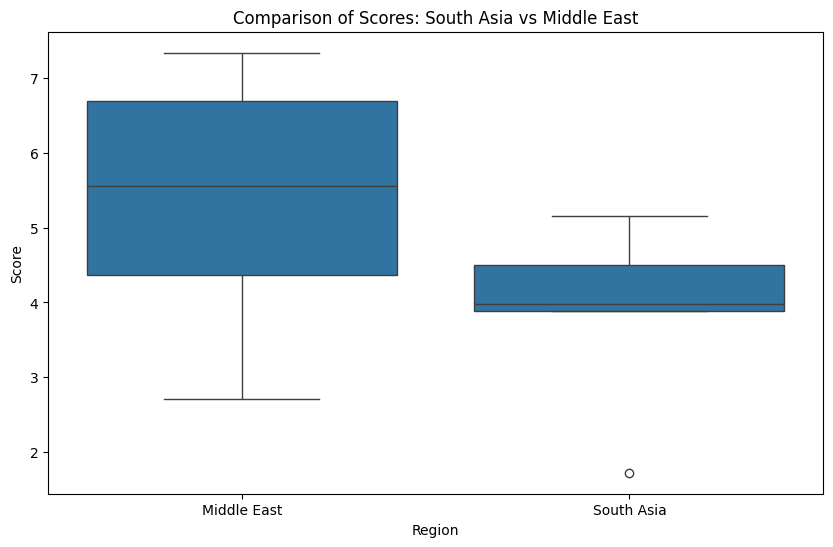

In [ ]:
combined_df = pd.concat([middle_eastern_df, south_asian_countries_df], ignore_index=True)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=combined_df)
plt.title('Comparison of Scores: South Asia vs Middle East')
plt.xlabel('Region')
plt.ylabel('Score')
plt.show()

As we can see, the median score in middle east higher than south asia. Middle east has wider box than south asia which indicates greater variablility in scores. As we can see, there are no outliers in Middle East and there is an outlier in South asia which is Afghanistan.